<a href="https://colab.research.google.com/github/ApahSaroj/WPI/blob/main/AutoML_FLAML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/microsoft/FLAML/blob/main/notebook/flaml_xgboost.ipynb

In [1]:
pip install flaml[notebook];

In [2]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_excel('/content/drive/MyDrive/DATA/WQC_test.xlsx')
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df.drop(df.columns[df.columns.str.contains('WQC',case = False)],axis = 1, inplace = True)
df

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.80,0.758000,6.534660,0.06211,0.249528
1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.80,0.196062,8.138620,0.00960,0.216400
2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.80,0.298875,3.855625,0.01280,0.183814
3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.60,0.299590,2.238750,0.01536,0.219282
4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.30,0.106000,5.600000,0.01000,0.165831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,7.60,5.6,224.0,8.0,370.0,16.14,92.0,24.0,7.60,2.270,23.04,1.352000,104.480000,0.01500,0.419630
483,7.30,5.6,266.0,96.0,434.0,20.56,96.0,32.0,9.89,1.550,30.86,7.074000,61.068000,0.03300,0.432996
484,5.10,5.8,290.0,12.0,487.0,37.35,60.0,44.0,14.80,0.159,60.13,9.256000,89.910000,0.16300,0.326811
485,7.40,6.4,230.0,72.0,385.0,20.06,70.0,42.0,10.35,1.360,32.92,7.110435,48.500000,0.21900,0.509970


In [5]:
print(df.isnull().sum())

pH            0
DO            0
TDS           0
Alkalinity    0
EC            0
Na            0
Ca            0
Mg            0
K             0
F             0
Cl            0
Nitrate       0
Sulphate      0
Phosphate     2
WPI           0
dtype: int64


In [6]:
df = df.dropna()

In [7]:
print(df.isnull().sum())

pH            0
DO            0
TDS           0
Alkalinity    0
EC            0
Na            0
Ca            0
Mg            0
K             0
F             0
Cl            0
Nitrate       0
Sulphate      0
Phosphate     0
WPI           0
dtype: int64


In [8]:
# Taking  all rows and all columns in the data except the last column as X (feature matrix)
#the row numbers and customer id's are not necessary for the modelling so we get rid of and start with credit score
X = df.iloc[:,0:-1].values
print("Independent variables are:", X)
#taking all rows but only the last column as Y(dependent variable)
y = df.iloc[:, -1].values
print("Dependent variable is:", y)

Independent variables are: [[8.1400000e+00 8.7000000e+00 8.4000000e+01 ... 7.5800000e-01
  6.5346600e+00 6.2110500e-02]
 [7.7000000e+00 8.8000000e+00 1.1000000e+02 ... 1.9606200e-01
  8.1386200e+00 9.6000000e-03]
 [7.6000000e+00 7.5000000e+00 7.5000000e+01 ... 2.9887500e-01
  3.8556250e+00 1.2800000e-02]
 ...
 [5.1000000e+00 5.8000000e+00 2.9000000e+02 ... 9.2560000e+00
  8.9910000e+01 1.6300000e-01]
 [7.4000000e+00 6.4000000e+00 2.3000000e+02 ... 7.1104355e+00
  4.8500000e+01 2.1900000e-01]
 [7.6000000e+00 6.9000000e+00 2.4300000e+02 ... 6.3850000e+00
  5.9940000e+01 7.0000000e-02]]
Dependent variable is: [0.24952772 0.21639962 0.18381411 0.21928185 0.16583135 0.30862698
 0.4068906  0.29180421 0.21992977 0.23733965 0.26441304 0.27733543
 0.2477512  0.25743115 0.51679302 0.21917643 0.26586048 0.26586048
 0.25265698 0.28963056 0.38051071 0.36357127 0.28449556 0.25478242
 0.25471889 0.37001056 0.2216364  0.2780727  0.25375634 0.23331203
 0.20389072 0.28741993 0.18819563 0.29640025 0.2767

In [9]:
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
#printing the dimensions of each of those snapshots to see amount of rows and columns i each of them
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(388, 14) (97, 14)
(388,) (97,)


In [10]:
from flaml import AutoML
automl = AutoML()

In [11]:
settings = {
    "time_budget": 60,  # total running time in seconds
    "metric": 'r2',  # primary metrics for regression can be chosen from: ['mae','mse','r2']
    "estimator_list": ['xgboost'],  # list of ML learners; we tune xgboost in this example
    "task": 'regression',  # task type    
    "log_file_name": 'houses_experiment.log',  # flaml log file
}

In [12]:
automl.fit(X_train=X_train, y_train=y_train, **settings)

[flaml.automl: 08-01 03:53:08] {913} INFO - Evaluation method: cv
[flaml.automl: 08-01 03:53:08] {617} INFO - Using RepeatedKFold
[flaml.automl: 08-01 03:53:08] {934} INFO - Minimizing error metric: 1-r2
[flaml.automl: 08-01 03:53:08] {954} INFO - List of ML learners in AutoML Run: ['xgboost']
[flaml.automl: 08-01 03:53:08] {1020} INFO - iteration 0, current learner xgboost
[flaml.automl: 08-01 03:53:09] {1180} INFO -  at 0.1s,	best xgboost's error=2.1787,	best xgboost's error=2.1787
[flaml.automl: 08-01 03:53:09] {1020} INFO - iteration 1, current learner xgboost
[flaml.automl: 08-01 03:53:09] {1180} INFO -  at 0.1s,	best xgboost's error=2.1787,	best xgboost's error=2.1787
[flaml.automl: 08-01 03:53:09] {1020} INFO - iteration 2, current learner xgboost
[flaml.automl: 08-01 03:53:09] {1180} INFO -  at 0.2s,	best xgboost's error=0.7034,	best xgboost's error=0.7034
[flaml.automl: 08-01 03:53:09] {1020} INFO - iteration 3, current learner xgboost
[flaml.automl: 08-01 03:53:09] {1180} INF

In [13]:
print('Best hyperparmeter config:', automl.best_config)
print('Best r2 on validation data: {0:.4g}'.format(1 - automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

Best hyperparmeter config: {'n_estimators': 204, 'max_leaves': 6, 'min_child_weight': 0.005632452124609419, 'learning_rate': 0.1325236559752437, 'subsample': 0.7584301068911125, 'colsample_bylevel': 0.738034831046731, 'colsample_bytree': 0.9369518394105365, 'reg_alpha': 0.011139933812249503, 'reg_lambda': 1.1373250806186728}
Best r2 on validation data: 0.9137
Training duration of best run: 0.7567 s


In [14]:
automl.model.estimator


In [15]:
import pickle
with open('automl.pkl', 'wb') as f:
    pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

In [16]:
y_pred = automl.predict(X_test)
print('Predicted labels', y_pred)
print('True labels', y_test)

Predicted labels [0.22710925 0.28422743 0.3984191  0.31287247 0.23266795 0.24291602
 0.28147525 0.18855575 0.31287247 0.36037987 0.18193394 0.24287552
 0.32612792 0.27838147 0.43183815 0.31574607 0.46550012 0.20076445
 0.2285583  0.30401623 0.23184046 0.4551912  0.21121249 0.24269605
 0.23040536 0.35311216 0.22878587 0.7481741  0.22290662 0.29414153
 0.26774716 0.25841507 0.2563571  0.37733638 0.37467998 0.4467549
 0.47245216 0.22705892 0.2162888  0.22800562 0.24970123 0.25428915
 0.31592003 0.2479712  0.21594286 0.3385237  0.2154805  0.2137256
 0.2545587  0.2171748  0.21149418 0.31706706 0.165862   0.21298099
 0.31287247 0.2195046  0.20295775 0.1791066  0.23003286 0.42616683
 0.37388816 0.3216949  0.38444698 0.21344069 0.32514727 0.7711323
 0.2575004  0.29414153 0.44457155 0.91440797 0.5237487  0.22445396
 0.23436147 0.8633385  0.21966901 0.3559221  0.23334473 0.2168827
 0.4455067  0.19642061 0.24694574 0.2543124  0.37838423 0.26838958
 0.40941414 0.21547377 0.24888694 0.280015   0.38

In [17]:
from flaml.ml import sklearn_metric_loss_score
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_test))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_test))


r2 = 0.970573989284961
mse = 0.0007324448420536676
mae = 0.012334653570777112


In [18]:

from flaml.data import get_output_from_log
time_history, best_valid_loss_history, valid_loss_history, config_history, train_loss_history = \
    get_output_from_log(filename=settings['log_file_name'], time_budget=60)

for config in config_history:
    print(config)

{'Current Learner': 'xgboost', 'Current Sample': 388, 'Current Hyper-parameters': {'n_estimators': 4, 'max_leaves': 4, 'min_child_weight': 1, 'learning_rate': 0.1, 'subsample': 1.0, 'colsample_bylevel': 1.0, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}, 'Best Learner': 'xgboost', 'Best Hyper-parameters': {'n_estimators': 4, 'max_leaves': 4, 'min_child_weight': 1, 'learning_rate': 0.1, 'subsample': 1.0, 'colsample_bylevel': 1.0, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}}
{'Current Learner': 'xgboost', 'Current Sample': 388, 'Current Hyper-parameters': {'n_estimators': 4, 'max_leaves': 4, 'min_child_weight': 0.2620811530815948, 'learning_rate': 0.25912534572860507, 'subsample': 0.9266743941610592, 'colsample_bylevel': 1.0, 'colsample_bytree': 1.0, 'reg_alpha': 0.0013933617380144255, 'reg_lambda': 0.18096917948292954}, 'Best Learner': 'xgboost', 'Best Hyper-parameters': {'n_estimators': 4, 'max_leaves': 4, 'min_child_weight': 0.262081

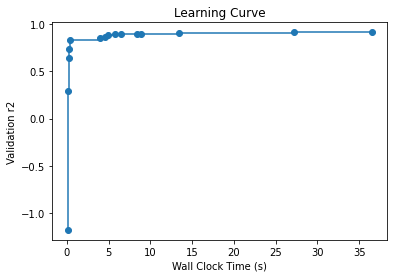

In [19]:
import matplotlib.pyplot as plt
import numpy as np

plt.title('Learning Curve')
plt.xlabel('Wall Clock Time (s)')
plt.ylabel('Validation r2')
plt.scatter(time_history, 1 - np.array(valid_loss_history))
plt.step(time_history, 1 - np.array(best_valid_loss_history), where='post')
plt.show()

In [20]:
print('flaml (60s) r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))

flaml (60s) r2 = 0.970573989284961


In [21]:
from xgboost import XGBRegressor
xgb = XGBRegressor()

In [22]:
xgb.fit(X_train, y_train)

[03:58:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [23]:
y_pred = xgb.predict(X_test)
from flaml.ml import sklearn_metric_loss_score
print('default xgboost r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))

default xgboost r2 = 0.9534410088970411


In [25]:
import numpy as np 

''' define your customized objective function '''
def logregobj(preds, dtrain):
    labels = dtrain.get_label()
    preds = 1.0 / (1.0 + np.exp(-preds)) # transform raw leaf weight
    grad = preds - labels
    hess = preds * (1.0 - preds)
    return grad, hess

''' create customized XGBoost learners class with your objective function '''
from flaml.model import XGBoostEstimator


class MyXGB1(XGBoostEstimator):
    '''XGBoostEstimator with the logregobj function as the objective function
    '''

    def __init__(self, **params):
        super().__init__(objective=logregobj, **params) 


class MyXGB2(XGBoostEstimator):
    '''XGBoostEstimator with 'reg:squarederror' as the objective function
    '''

    def __init__(self, **params):
        super().__init__(objective='reg:gamma', **params)

from flaml import AutoML
automl = AutoML()
automl.add_learner(learner_name='my_xgb1', learner_class=MyXGB1)
automl.add_learner(learner_name='my_xgb2', learner_class=MyXGB2)
settings = {
    "time_budget": 30,  # total running time in seconds
    "metric": 'r2',  # primary metrics for regression can be chosen from: ['mae','mse','r2']
    "estimator_list": ['my_xgb1', 'my_xgb2'],  # list of ML learners; we tune lightgbm in this example
    "task": 'regression',  # task type    
    
}
automl.fit(X_train=X_train, y_train=y_train, **settings)

[flaml.automl: 08-01 04:00:20] {913} INFO - Evaluation method: cv
[flaml.automl: 08-01 04:00:20] {617} INFO - Using RepeatedKFold
[flaml.automl: 08-01 04:00:20] {934} INFO - Minimizing error metric: 1-r2
[flaml.automl: 08-01 04:00:20] {954} INFO - List of ML learners in AutoML Run: ['my_xgb1', 'my_xgb2']
[flaml.automl: 08-01 04:00:20] {1020} INFO - iteration 0, current learner my_xgb1
[flaml.automl: 08-01 04:00:20] {1180} INFO -  at 0.1s,	best my_xgb1's error=5.6422,	best my_xgb1's error=5.6422
[flaml.automl: 08-01 04:00:20] {1020} INFO - iteration 1, current learner my_xgb1
[flaml.automl: 08-01 04:00:20] {1180} INFO -  at 0.1s,	best my_xgb1's error=0.5948,	best my_xgb1's error=0.5948
[flaml.automl: 08-01 04:00:20] {1020} INFO - iteration 2, current learner my_xgb1
[flaml.automl: 08-01 04:00:20] {1180} INFO -  at 0.1s,	best my_xgb1's error=0.5948,	best my_xgb1's error=0.5948
[flaml.automl: 08-01 04:00:20] {1020} INFO - iteration 3, current learner my_xgb1
[flaml.automl: 08-01 04:00:20]

In [26]:
print('Best hyperparmeter config:', automl.best_config)
print('Best r2 on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

y_pred = automl.predict(X_test)
print('Predicted labels', y_pred)
print('True labels', y_test)

from flaml.ml import sklearn_metric_loss_score
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_test))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_test))

Best hyperparmeter config: {'n_estimators': 388, 'max_leaves': 6, 'min_child_weight': 0.1536939383068592, 'learning_rate': 0.07325108998320864, 'subsample': 0.7364103002327189, 'colsample_bylevel': 0.9353049063592492, 'colsample_bytree': 1.0, 'reg_alpha': 0.008071628159455732, 'reg_lambda': 2.676707245908972}
Best r2 on validation data: 0.9124
Training duration of best run: 1.821 s
Predicted labels [0.22985798 0.2823881  0.38726646 0.3180356  0.23282781 0.2484642
 0.28358695 0.19276106 0.3180356  0.356709   0.18307744 0.24455424
 0.3270215  0.2718567  0.43626663 0.32338855 0.43455425 0.19614036
 0.22431697 0.30082977 0.23566099 0.4233394  0.21388377 0.24636512
 0.2308634  0.3610587  0.23127334 0.8789088  0.22848304 0.29312855
 0.26495647 0.24302562 0.25606298 0.37022203 0.37206066 0.4224815
 0.48477155 0.22710903 0.21344194 0.22427237 0.25334623 0.26071486
 0.31469193 0.23833399 0.21432146 0.3435551  0.2159092  0.21770355
 0.2558709  0.21592212 0.20686288 0.335696   0.16903044 0.210772